# Build an Image Classification Model

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

# Load Data

In [3]:
df1 = pd.read_csv("cifar10_train.csv")

In [4]:
df1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [6]:
X_train = df1.drop("label", axis=1)
Y_train = df1["label"]

In [7]:
df2 = pd.read_csv("cifar10_test.csv")

In [8]:
df2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [9]:
X_test = df2

In [10]:
X_train.shape

(50000, 3072)

In [11]:
X_test.shape

(10000, 3072)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [13]:
Y_train = np.array(Y_train)

In [14]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
X_test.shape

(10000, 32, 32, 3)

# Build and Train Model

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (2,2), activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [20]:
model.compile(loss= SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [21]:
e = 5
H = model.fit(X_train, Y_train, epochs = e, batch_size=32)

2022-11-15 16:57:52.600868: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1228800000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 25s 16ms/step - loss: 2.1809 - accuracy: 0.1632
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9219 - accuracy: 0.2836
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8033 - accuracy: 0.3368
Epoch 4/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7611 - accuracy: 0.3548
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7150 - accuracy: 0.3749


# Plot Loss and Accuracy

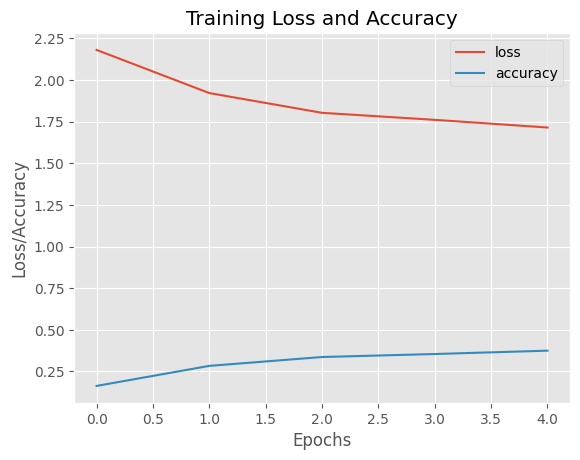

In [22]:
plt.style.use("ggplot")
plt.plot(np.arange(0,e), H.history["loss"], label="loss")
plt.plot(np.arange(0,e), H.history["accuracy"],label="accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Training Loss and Accuracy")
plt.legend()

In [23]:
Y_pred = model.predict(X_test, batch_size=32)

 10/313 [..............................] - ETA: 1s 

2022-11-15 17:03:00.307022: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 245760000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step


In [24]:
Y_pred.shape

(10000, 10)

In [25]:
Y_pred = Y_pred.argmax(axis=1)

In [26]:
Y_pred.shape

(10000,)

In [27]:
Y_pred

array([1, 9, 9, ..., 5, 6, 7])